<a href="https://colab.research.google.com/github/Muhammadabuabakr/Asessment-Analysis/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd 
import numpy as np 
path = "/content/drive/MyDrive/Colab Notebooks/Bondora_raw.csv"
missing_value = ["n/a","na","--"," "]
data = pd.read_csv(path, na_values = missing_value)
np.random.seed(0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (34,37,38,80,82,83,89,90) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
data.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+


In [7]:
missing_count = data.isnull().sum()
total_mv = data.isnull().sum().sum()
print ("missing count =", missing_count)
print ("Toltal missing value =", total_mv)

missing count = ReportAsOfEOD                              0
LoanId                                     0
LoanNumber                                 0
ListedOnUTC                                0
BiddingStartedOn                           0
                                       ...  
NrOfScheduledPayments                  36741
ReScheduledOn                          94207
PrincipalDebtServicingCost             75400
InterestAndPenaltyDebtServicingCost    75400
ActiveLateLastPaymentCategory          82279
Length: 112, dtype: int64
Toltal missing value = 3672641


In [8]:
#now we find the percentage of null value from data
cells = np.product(data.shape)
print (cells)
total_missing = missing_count.sum()
perc_null = (total_missing / cells)*100
print (perc_null)

15067248
24.374995354161555


In [9]:
column_nan = data.dropna(axis = 1)
column_nan.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,ActiveScheduleFirstPaymentReached,Status,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,True,Repaid,False,115.0408,20.4222,0.00,0.00,1,83.0852,0
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,True,Repaid,False,140.6057,2.0227,0.00,0.00,2,255.6467,0
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,True,Late,True,203.1909,59.7626,116.35,414.07,0,0.0000,0
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,True,Repaid,False,57.5205,18.7323,0.00,0.00,1,134.2144,0
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,True,Repaid,False,319.5436,220.4200,0.00,0.00,1,146.9966,0


In [10]:
print("Columns in original dataset: %d \n" % data.shape[1])
print("Columns with na's dropped: %d" % column_nan.shape[1])

Columns in original dataset: 112 

Columns with na's dropped: 48


In [11]:
x = data["Age"].mean()
data["Age"].fillna(x)

0         61
1         48
2         58
3         23
4         25
          ..
134524    37
134525    35
134526    40
134527    47
134528    21
Name: Age, Length: 134529, dtype: int64

In [25]:
cont1 = 0
cont2 = 0
cont3 = 0
cont4= 0
cont5 = 0
cont_1 = 0
for x in data["MaritalStatus"]: 
  if (x == 1.0):
    cont1 += 1
  elif (x == 2.0):
    cont2 += 1
  elif (x == 3.0):
    cont3 += 1
  elif (x == 4.0):
    cont4 += 1
  elif (x == 5.0): 
    cont5 += 1
  elif (x == -1.0):
    cont_1 += 1
print ("Cont1 = ",cont1,"Cont2 = ",cont2,"Cont3 = ",cont3,"Cont4 = ",cont4,"Cont5 = ",cont5,"Cont_1 = ",cont_1)

Cont1 =  10752 Cont2 =  9400 Cont3 =  110391 Cont4 =  3377 Cont5 =  601 Cont_1 =  0


98083

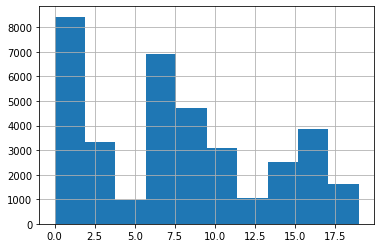

In [64]:
data["OccupationArea"].hist()
data["OccupationArea"].replace(to_replace = -1.0,value = np.NaN, inplace = True)
data["OccupationArea"].isnull().sum()
    
    

In [120]:
attr_list = ["VerificationType","Gender","Education","EmploymentPosition","EmploymentStatus","MaritalStatus","HomeOwnershipType","OccupationArea","ContractEndDate","RecoveryStage","ModelVersion","Rating","Rating_V0","Rating_V1","Rating_V2","ActiveLateCategory","WorseLateCategory","CreditScoreEsMicroL","CreditScoreEsEquifaxRisk","EmploymentDurationCurrentEmployer","NrOfDependants"]
for i in attr_list:
  mode_of_Attr = data[i].mode()[0]
  print (mode_of_Attr)
  data[i].fillna(mode_of_Attr, inplace = True)
  print (i,"= ",data[i].isnull().sum())
  

4.0
VerificationType =  0
0.0
Gender =  0
4.0
Education =  0
Worker
EmploymentPosition =  0
3.0
EmploymentStatus =  0
3.0
MaritalStatus =  0
1.0
HomeOwnershipType =  0
1.0
OccupationArea =  0
2024-12-27 00:00:00
ContractEndDate =  0
1.0
RecoveryStage =  0
6.0
ModelVersion =  0
E
Rating =  0
HR
Rating_V0 =  0
HR
Rating_V1 =  0
HR
Rating_V2 =  0
180+
ActiveLateCategory =  0
180+
WorseLateCategory =  0
M
CreditScoreEsMicroL =  0
B
CreditScoreEsEquifaxRisk =  0
MoreThan5Years
EmploymentDurationCurrentEmployer =  0
0
NrOfDependants =  0


In [66]:
data["Country"].fillna("NotGiven",inplace = True)
data["City"].fillna("NotGiven",inplace = True)

In [67]:
data["WorkExperience"].fillna(0, inplace = True)
data["WorkExperience"].isnull().sum()


0

In [77]:
data["CurrentDebtDaysPrimary"].mean()

593.4480192918093

In [108]:
attr_list = ["MonthlyPayment","DebtToIncome","FreeCash","PlannedInterestTillDate","PlannedPrincipalTillDate","CurrentDebtDaysPrimary","CurrentDebtDaysSecondary","ExpectedLoss","ExpectedReturn","LossGivenDefault","ProbabilityOfDefault","PrincipalOverdueBySchedule","PlannedPrincipalPostDefault","PlannedInterestPostDefault","EAD1","EAD2","PrincipalRecovery","InterestRecovery","EL_V0","EL_V1"]
for i in attr_list:
  mean_of_Attr = data[i].mean()
  print ("Mean_Value = ", mean_of_Attr)
  data[i].fillna(mean_of_Attr, inplace = True)
  print (i,"null_value = ",data[i].isnull().sum())
  

Mean_Value =  113.16596176289126
MonthlyPayment null_value =  0
Mean_Value =  7.76642478573393
DebtToIncome null_value =  0
Mean_Value =  122.23911937479551
FreeCash null_value =  0
Mean_Value =  708.8837982425509
PlannedInterestTillDate null_value =  0
Mean_Value =  994.5580140729724
PlannedPrincipalTillDate null_value =  0
Mean_Value =  593.4480192918091
CurrentDebtDaysPrimary null_value =  0
Mean_Value =  612.7330526315789
CurrentDebtDaysSecondary null_value =  0
Mean_Value =  0.1492548107589651
ExpectedLoss null_value =  0
Mean_Value =  0.13655844788257313
ExpectedReturn null_value =  0
Mean_Value =  0.4090646832413614
LossGivenDefault null_value =  0
Mean_Value =  0.25243404896279753
ProbabilityOfDefault null_value =  0
Mean_Value =  232.9599184799318
PrincipalOverdueBySchedule null_value =  0
Mean_Value =  849.8386946289177
PlannedPrincipalPostDefault null_value =  0
Mean_Value =  1099.982242572527
PlannedInterestPostDefault null_value =  0
Mean_Value =  2351.471556206455
EAD1 nu

In [131]:
Date_value = ["LastPaymentOn","DebtOccuredOn","DebtOccuredOnForSecondary","DefaultDate","StageActiveSince"]
for i in Date_value:
  data[i].fillna("Not Given",inplace = True)
  print(data[i].isnull().sum())

0
0
0
0
0


In [128]:
data["LastPaymentOn"].dropna()

0         2010-07-06
1         2009-07-07
2         2012-10-01
3         2010-09-15
4         2015-07-16
             ...    
134524    2019-02-12
134525    2019-02-07
134526    2020-01-17
134527    2019-12-20
134528    2019-10-15
Name: LastPaymentOn, Length: 124998, dtype: object

In [130]:
data["Country"].isnull().sum()

0